## Simple Barchart Comparision

A common issue of stacked barchart is that it is difficult to compare categories that are stacked on top of one another due to different starting and ending y-axes. As shown in fig1, it is hard to see how the women category compares across groups. <br />

Therefore, a simple solution is to allow users to interactively choose the category to display at the bottom by clicking on the legends. <br /> Based on data from: [Singstat](https://www.singstat.gov.sg/publications/ghs/ghs2015) on Singapore's religion spread across types of dwelling in 2015.

<IPython.core.display.Javascript object>


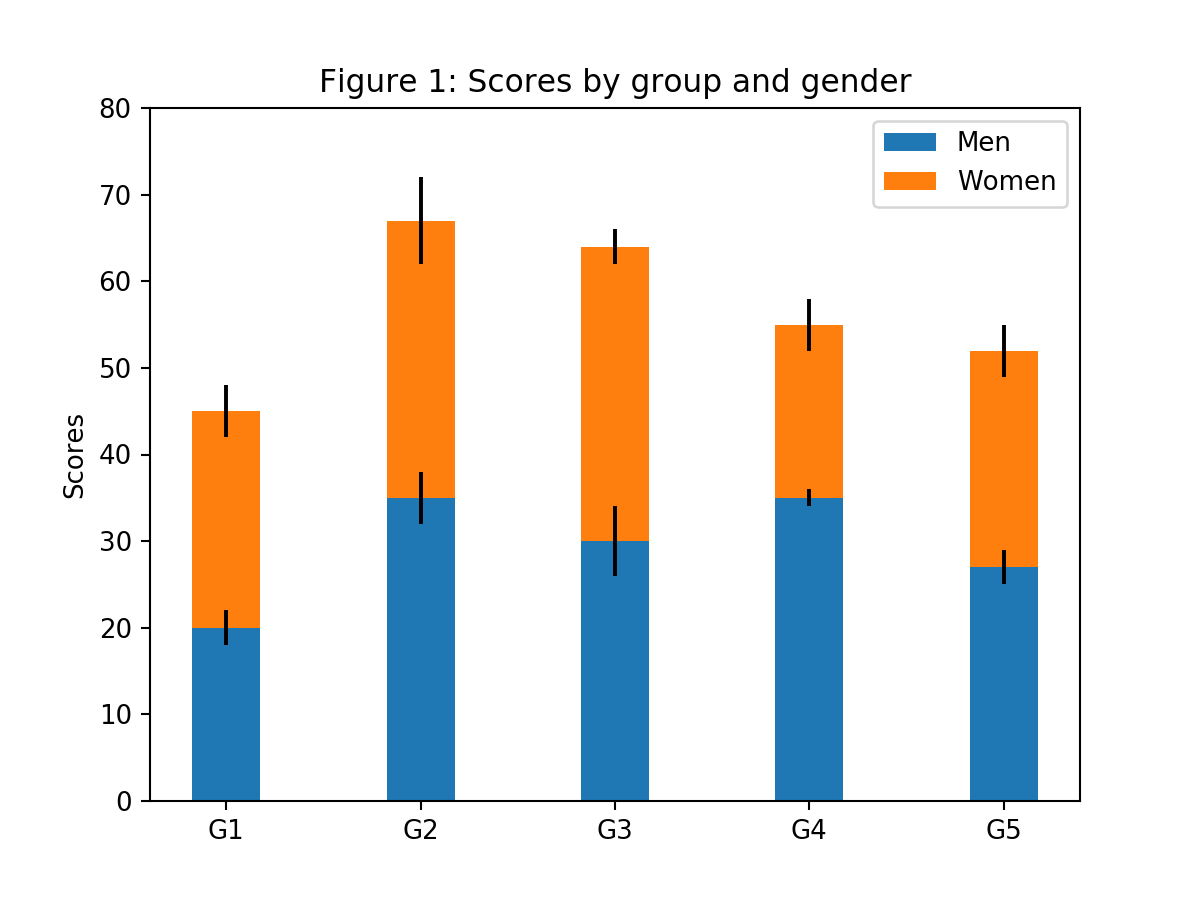

In [3]:
#Taken from matplotlib documentation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Figure 1: Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [5]:
import pandas as pd
import numpy as np

df_reli = pd.read_excel('religionbydwelling2015.xlsx')
df_reli = df_reli.set_index('Type of Dwelling')
df_reli.rename(index = {"1-and 2-Room Flats2/":"1-2 Room Flats", 
                        "Condominiums and Other Apartments":"Condominiums"
                        , "3-Room Flats" : "3-Room Flats"
                        , "4-Room Flats": "4-Room Flats"
                        , "5-Room & Executive Flats": "5-Executive Room Flats"
                        , "Landed Properties" : "Landed"}, inplace = True)
df_reli = df_reli.iloc[2:-1,1:-1]
df_reli = df_reli.multiply(1000)
df_reli

,No Religion,Buddhism,Taoism,Islam,Hinduism,Sikhism,Christianity
Type of Dwelling,,,,,,,
1-2 Room Flats,13100.0,33500.0,9400.0,44100.0,5400.0,800.0,11700.0
3-Room Flats,77200.0,199600.0,59900.0,84200.0,27500.0,1000.0,67700.0
4-Room Flats,181600.0,422600.0,135900.0,191700.0,51700.0,2700.0,152600.0
5-Executive Room Flats,178500.0,289800.0,85600.0,126400.0,47100.0,4700.0,182600.0
Condominiums,104700.0,91200.0,18200.0,8300.0,24400.0,1500.0,122500.0
Landed,47600.0,46800.0,16400.0,4900.0,6100.0,800.0,76300.0


<IPython.core.display.Javascript object>


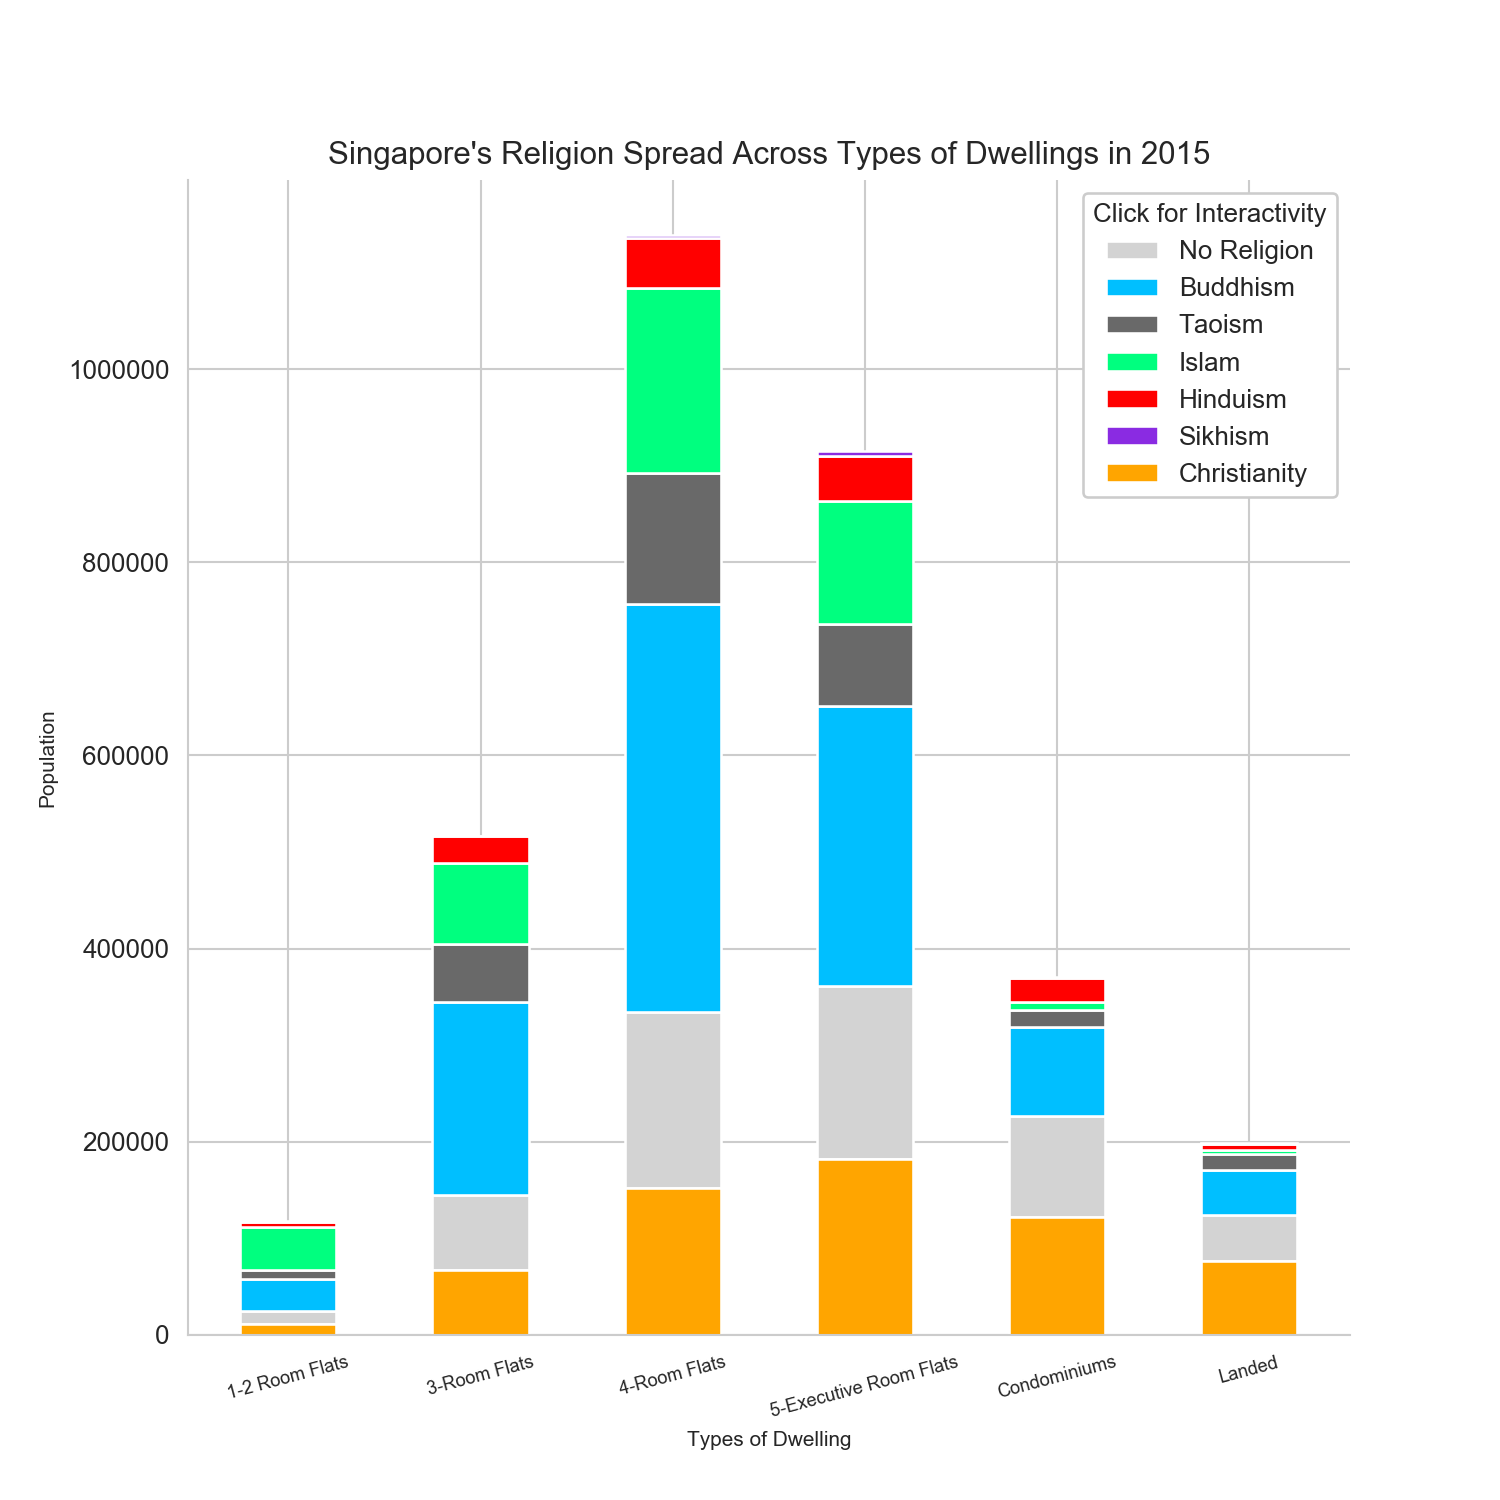

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
%matplotlib notebook

#Separate and plot each bar.
bar_n = df_reli['No Religion']
bar_b = df_reli['Buddhism']
bar_t = df_reli['Taoism']
bar_i = df_reli['Islam']
bar_h = df_reli['Hinduism']
bar_s = df_reli['Sikhism']
bar_c = df_reli['Christianity']
xloc = np.arange(len(bar_n))
width = 0.5


fig = plt.figure(figsize=(8,8))
p1 = plt.bar(xloc, bar_n, width, color='lightgrey', label='No Religion')
p2 = plt.bar(xloc, bar_b, width, color='deepskyblue', bottom=bar_n, label='Buddhism')
p3 = plt.bar(xloc, bar_t, width, color='dimgrey', bottom=bar_n+bar_b, label='Taoism')
p4 = plt.bar(xloc, bar_i, width, color='springgreen', bottom=bar_n+bar_b+bar_t, label='Islam')
p5 = plt.bar(xloc, bar_h, width, color='red', bottom=bar_n+bar_b+bar_t+bar_i, label='Hinduism')
p6 = plt.bar(xloc, bar_s, width, color='blueviolet', bottom=bar_n+bar_b+bar_t+bar_i+bar_h, label='Sikhism')
p7 = plt.bar(xloc, bar_c, width, color='orange', bottom=bar_n+bar_b+bar_t+bar_i+bar_h+bar_s, label='Christianity')
leg = plt.legend(frameon = True, title = "Click for Interactivity", framealpha = 1)

#Visual
plt.xticks(xloc, df_reli.index.tolist(), fontsize = 7, rotation = 15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Population', fontsize = 8)
plt.xlabel('Types of Dwelling', fontsize = 8)
plt.title("Singapore's Religion Spread Across Types of Dwellings in 2015")
plt.grid(True)

#Interactivity
barcontainers = [p1, p2, p3, p4, p5, p6, p7]
entry = []
for legenditem in leg.get_patches():
    legenditem.set_picker(5)
    entry.append(legenditem)
    
def onpick(event):
    tempbarcontainers = barcontainers[:] #temp to contain the bars
    selectedforbottom = entry.index(event.artist) 
    
    bottombar = tempbarcontainers[selectedforbottom].patches #legend representing the category that is clicked on.
    tempbarcontainers.pop(selectedforbottom) 
    bar1 = tempbarcontainers[0].patches 
    bar2 = tempbarcontainers[1].patches 
    bar3 = tempbarcontainers[2].patches
    bar4 = tempbarcontainers[3].patches
    bar5 = tempbarcontainers[4].patches
    bar6 = tempbarcontainers[5].patches

    for bottom, b1, b2, b3, b4, b5, b6 in zip(bottombar, bar1, bar2, bar3, bar4, bar5, bar6):
        bottom.set_y(0) 
        b1.set_y(bottom.get_height()) 
        b2.set_y(bottom.get_height() + b1.get_height())
        b3.set_y(bottom.get_height() + b1.get_height() + b2.get_height())
        b4.set_y(bottom.get_height() + b1.get_height() + b2.get_height()+ b3.get_height())
        b5.set_y(bottom.get_height() + b1.get_height() + b2.get_height()+ b3.get_height() + b4.get_height())
        b6.set_y(bottom.get_height() + b1.get_height() + b2.get_height()+ b3.get_height() + b4.get_height() + b5.get_height())

    fig.canvas.draw()
    
fig.canvas.mpl_connect('pick_event', onpick)

plt.show()